Analyze sales data with Pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv('Downloads/fct_invoice.csv')
customers = pd.read_json('Downloads/dim_customer.json')

invoices.head()
customers.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


Easy

1. How many unique customers are in the dataset?

In [2]:
unique_customers = invoices['customer_id'].nunique()
print("Unique customers:", unique_customers)

Unique customers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [3]:
unique_categories = invoices['category'].unique()
num_categories = invoices['category'].nunique()
print("Categories:", unique_categories)
print("Number of unique categories:", num_categories)

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


3. Which payment method is the most popular? How many times was it used?

In [4]:
popular_payment = invoices['payment_method'].value_counts().idxmax()
times_used = invoices['payment_method'].value_counts().max()
print("Most popular payment method:", popular_payment)
print("Times used:", times_used)

Most popular payment method: Cash
Times used: 44447


Medium

1. What are the three most popular categories, by total sales?

In [16]:
invoices['total'] = invoices['quantity'] * invoices['price']

top_categories = invoices.groupby('category')['total'].sum().sort_values(ascending=False).head(3)

print(top_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total, dtype: float64


2. What are the total sales attributed to customers over the age of 45?

In [17]:
merged = invoices.merge(customers, left_on='customer_id', right_on='id')

sales_over_45 = merged[merged['age'] > 45]['total'].sum()
sales_over_45

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

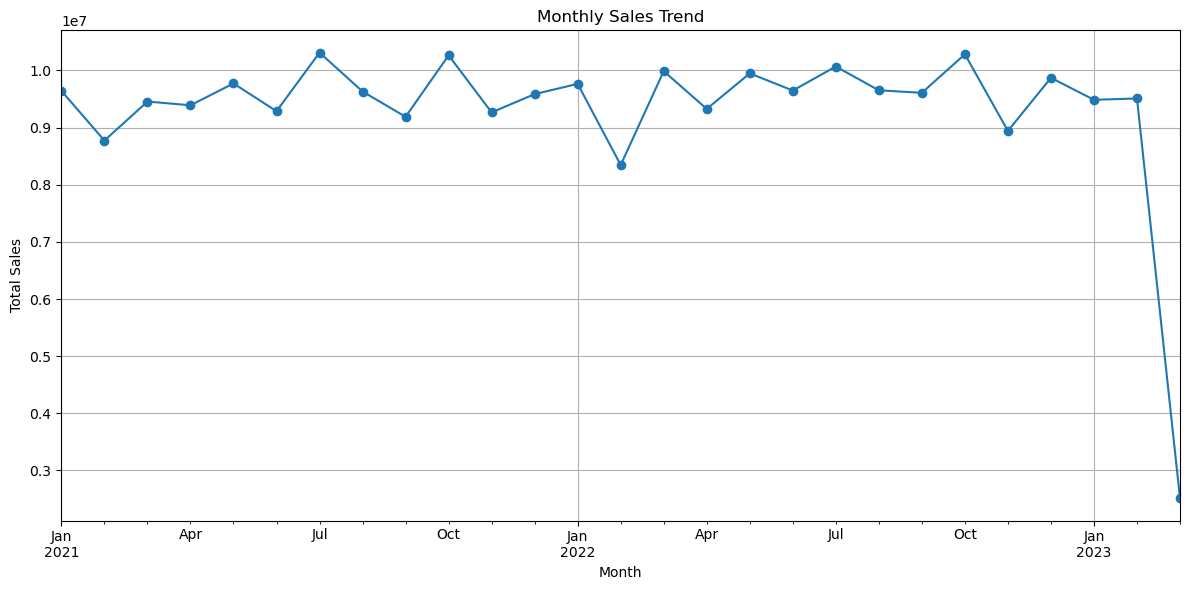

In [19]:
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)

monthly_sales = invoices.groupby(invoices['invoice_date'].dt.to_period('M'))['total'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12, 6), title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [21]:
merged['age_group'] = pd.cut(
    merged['age'],
    bins=range(10, 100, 10),
    right=False,
    labels=[f"{i}-{i+9}" for i in range(10, 90, 10)]
)

pivot_table = pd.pivot_table(
    merged,
    values='total',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0,
    observed=False
)

pivot_table

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
